In [ ]:
"""
Author: Akankshya Mohanty
Mentor & Reviewer: Rajani Vanarse
#*******************************************************************
#Copyright (C) 2023 Adino Labs
#*******************************************************************
"""

In [ ]:
import warnings
warnings.filterwarnings("ignore")

! pip install scikit-learn==1.5.1

In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import pickle
%matplotlib inline

In [191]:
import sklearn

df=pd.read_csv("dataset.csv")
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
df.shape

(4920, 18)

In [193]:
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [194]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [195]:
df = df.fillna(0)

In [196]:
df["Disease"].value_counts()

Disease
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
hepatitis A                                120
Hepatitis B                                120
Hepat

In [197]:
df1=pd.read_csv("Symptom-severity.csv")
df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [198]:
df1["Symptom"].value_counts()

Symptom
fluid_overload                  2
muscle_pain                     1
irritability                    1
depression                      1
toxic_look_(typhos)             1
                               ..
swelling_of_stomach             1
swelled_lymph_nodes             1
malaise                         1
blurred_and_distorted_vision    1
diarrhoea                       1
Name: count, Length: 132, dtype: int64

In [199]:
dfx=pd.DataFrame()
dfx["Disease"]=df["Disease"]
dfx

,Disease
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection
...,...
4915,(vertigo) Paroymsal Positional Vertigo
4916,Acne
4917,Urinary tract infection
4918,Psoriasis


In [200]:
dfx=pd.DataFrame()
dfx["Disease"]=df["Disease"]
y=0

for index, row in df.iterrows():
    for symptom in df.columns[1:]:
        if row[symptom] != 0:
            dfx.loc[index, row[symptom]] = 1
dfx = dfx.fillna(0)
dfx[dfx.columns[1:]]=dfx[dfx.columns[1:]].astype('int')
dfx.head()

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
label=df["Disease"]
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label=le.fit_transform(label)
label

array([15, 15, 15, ..., 38, 35, 27])

In [202]:
data=dfx.drop(columns="Disease",axis=1)

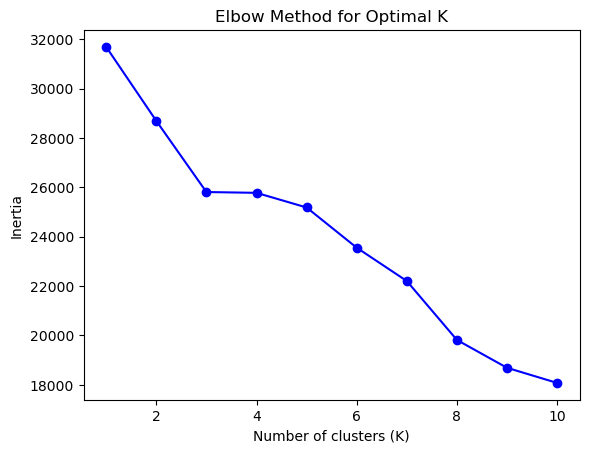

Number of outliers: 0 for KMeans


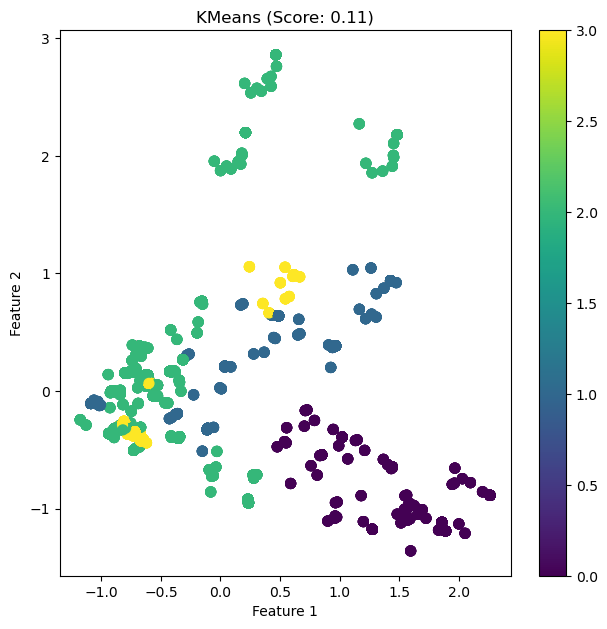

[0.10742013017938822]

In [203]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

pca = PCA()
X_reduced = pca.fit_transform(data)

inertia = []
K_range = range(1, 11)  # Try different values for K

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Create a figure for plotting
plt.figure(figsize=(18, 12))

# Based on the Elbow plot, choose 4 as cluster size
kmeans_model = KMeans(n_clusters=4, random_state=42)
scores = []
clusters = kmeans_model.fit_predict(data)

if len(set(clusters)) > 1:  # Silhouette score requires at least 2 clusters
    score = silhouette_score(data, clusters)
    scores.append(score)
else:
    scores.append(None)  # For cases where only one cluster is found

# Plot clusters
plt.subplot(2, 3, 1)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=50)
plt.title(f'{model.__class__.__name__} (Score: {score:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter)

num_outliers = np.sum(clusters == -1)
print(f'Number of outliers: {num_outliers} for {model.__class__.__name__}')


plt.tight_layout()
plt.show()

scores

In [204]:
import numpy as np

# Add the cluster labels as a new feature to X
data_with_clusters = np.hstack((X_reduced, clusters.reshape(-1, 1)))

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,label, train_size=0.6, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(data,label, test_size=0.2, random_state=42)

In [206]:
y=le.classes_
y

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [208]:
# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42)
}

# Function to train and evaluate a classifier
def train_and_evaluate_classifier(name, clf, X_train, y_train, X_test, y_test, X_val, y_val):
    # Train and cross-validate
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='f1_weighted')
    print(f'{name} cross-validation mean F1 score: {cv_scores.mean():.3f}')
    
    # Train on the whole training set
    clf.fit(X_train, y_train)
    
    # Evaluate on test set
    test_predictions = clf.predict(X_test)
    test_f1 = f1_score(y_test, test_predictions, average='weighted')
    test_roc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
    print(f'{name} test F1 Score: {test_f1:.4f}, AUC-ROC Score: {test_roc:.4f}')
    
    # Evaluate on validation set
    val_predictions = clf.predict(X_val)
    val_f1 = f1_score(y_val, val_predictions, average='weighted')
    val_roc = roc_auc_score(y_val, clf.predict_proba(X_val), multi_class='ovr')
    print(f'{name} validation F1 Score: {val_f1:.4f}, AUC-ROC Score: {val_roc:.4f}')
    
    # Save the model
    with open(f"{name}.pkl", "wb") as f:
        pickle.dump(clf, f)



# Iterate over classifiers and train/evaluate each one
for name, clf in classifiers.items():
    print(f"Training and evaluating {name}...")
    train_and_evaluate_classifier(name, clf, X_train, y_train, X_test, y_test, X_val, y_val)

Training and evaluating Random Forest...
Random Forest cross-validation mean F1 score: 1.000
Random Forest test F1 Score: 1.0000, AUC-ROC Score: 1.0000
Random Forest validation F1 Score: 1.0000, AUC-ROC Score: 1.0000


In [209]:
sd=pd.read_csv("symptom_Description.csv")
sd.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [210]:
sp=pd.read_csv("symptom_precaution.csv")
sp.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [211]:
import numpy as np

def pred_result(m, X, sd, sp):
    # Predict probabilities for each class
    proba = m.predict_proba(X)
    
    # Get the indices and probabilities of the top 5 classes
    top5_idx = np.argsort(proba[0])[-5:][::-1]
    top5_proba = np.sort(proba[0])[-5:][::-1]
    
    # Get the names of the top 5 diseases
    top5_diseases = y[top5_idx]
    
    for i in range(5):
        disease = top5_diseases[i]
        probability = top5_proba[i]
        
        print("Disease Name:", disease)
        print("Probability:", probability)
        
        if disease in sd["Disease"].unique():
            disp = sd[sd['Disease'] == disease].iloc[0, 1]
            print("Disease Description:", disp)
        
        if disease in sp["Disease"].unique():
            c = np.where(sp['Disease'] == disease)[0][0]
            precuation_list = sp.iloc[c, 1:].dropna().tolist()
            print("Recommended Things to do at home:")
            for precaution in precuation_list:
                print(precaution)
        
        print("\n")

In [212]:
x=dfx.columns[1:]
cols = pd.Series(len(dfx.columns) + 1)
for i in range(0, len(dfx.columns) -1):
    cols[i] = x[i].strip()

In [218]:
def main():
    t = pd.Series([0] * len(cols), index=cols)  # Adjust the length to match `x`
    with open("Random Forest.pkl", 'rb') as f:
        m = pickle.load(f)
    
    # Modify t for specific symptoms
    symptoms_to_include = ["runny_nose", "high_fever", "throat_irritation","vomiting", "fatigue", "nausea", "muscle_pain"]
    
    t.loc[symptoms_to_include] = 1
    
    # Convert t to numpy array and reshape
    t_array = t.to_numpy().reshape(1, -1)
    
    # Call pred_result function
    pred_result(m, t_array, sd, sp)

if __name__ == "__main__":
    main()


Disease Name: Malaria
Probability: 0.46
Disease Description: An infectious disease caused by protozoan parasites from the Plasmodium family that can be transmitted by the bite of the Anopheles mosquito or by a contaminated needle or transfusion. Falciparum malaria is the most deadly type.
Recommended Things to do at home:
Consult nearest hospital
avoid oily food
avoid non veg food
keep mosquitos out


Disease Name: Common Cold
Probability: 0.26
Disease Description: The common cold is a viral infection of your nose and throat (upper respiratory tract). It's usually harmless, although it might not feel that way. Many types of viruses can cause a common cold.
Recommended Things to do at home:
drink vitamin c rich drinks
take vapour
avoid cold food
keep fever in check


Disease Name: Hepatitis D
Probability: 0.08
Disease Description: Hepatitis D, also known as the hepatitis delta virus, is an infection that causes the liver to become inflamed. This swelling can impair liver function and ca